Link for course page - https://jovian.com/learn/machine-learning-with-python-zero-to-gbms/lesson/decision-trees-and-hyperparameters  
Link for video - https://www.youtube.com/watch?v=d6xH6k7_Zv4&t=1s

# 0* - Installing and importing modules and libraries

## 0.1 pip

In [9]:
!pip install pandas-profiling numpy matplotlib seaborn --quiet
!pip install opendatasets scikit-learn --quiet --upgrade

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.5.0 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.


## 0.2 Importing modules

In [122]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# 1 - Downloading the Data

In [267]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Skipping, found downloaded files in ".\weather-dataset-rattle-package" (use force=True to force download)


In [269]:
os.listdir('weather-dataset-rattle-package')

['weatherAUS.csv']

In [271]:
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [272]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

In [275]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [277]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

# 2 Exploratory Data Analysis and Vizualization

...

# 3 - Preparing the Data for Training

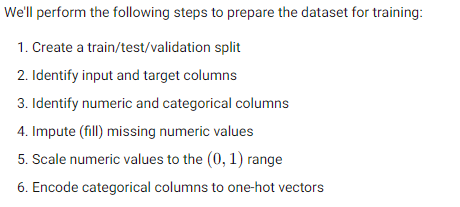

## 3.1 - Training, Validation and Test Sets

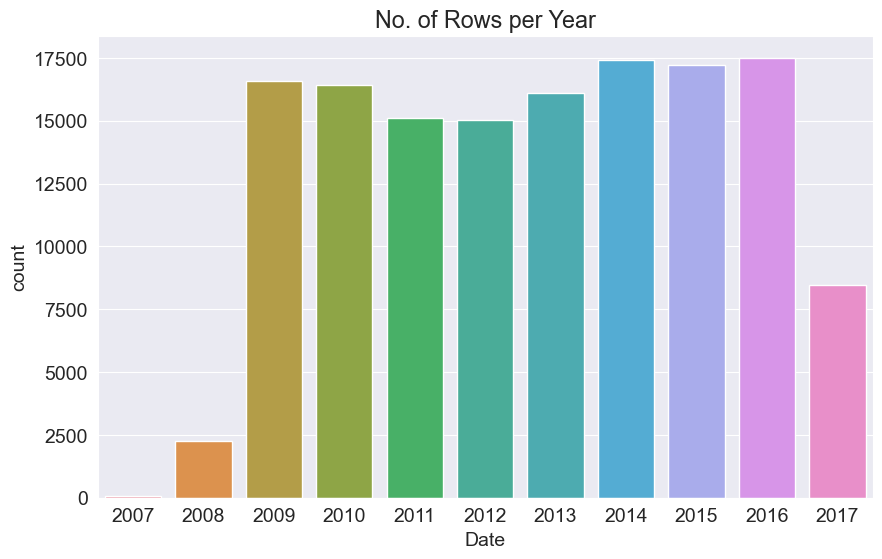

In [284]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [285]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


## 3.2 - Input and Target Columns

In [289]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [291]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [293]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [295]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [297]:
# Identify numeric and categorical columns
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [299]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [301]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


# 3.3 - Imputing missing numeric values

In [304]:
from sklearn.impute import SimpleImputer

In [306]:
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])

In [308]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [310]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

## 3.4 - Scaling Numeric Features

In [313]:
from sklearn.preprocessing import MinMaxScaler

In [315]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [317]:
raw_df[numeric_cols].describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm  
count  88536.000000  85099.000000  141289.000000  139467.000000  
mean       4.437189      4.503167      16.987509      21.687235  
std        2.887016      2.720633       6.492838       6.937594  
min        0.000000      0.000000      -7.200000      -5.400000  
25%        1.000000      2.000000      12.300000      16.600000  
50%        5.000000      5.000000      16.700000      21.100000  
75%        7.000000      7.000000      21.600000      26.400000  
max        9.000000      9.000000      40.200000      46.700000

In [319]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [321]:
val_inputs.describe().loc[['min', 'max']]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
min  0.007075  0.030246  0.000000     0.000000       0.0       0.007752   
max  0.952830  0.948960  0.666307     0.485517       1.0       1.000000   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
min      0.000000      0.000000         0.04          0.0     0.125620   
max      0.669231      0.850575         1.00          1.0     0.971901   

     Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
min       0.0816  0.000000  0.000000  0.021097  0.026871  
max       0.9632  0.888889  0.888889  0.943038  0.925144

## 3.5 - Encoding Categorical Data

In [324]:
from sklearn.preprocessing import OneHotEncoder

In [326]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(raw_df[categorical_cols])

# handle_unknown='ignore': This parameter specifies how to handle categories that were not seen during the fitting process.
# 'ignore' tells the encoder to ignore unseen categories during transformation (encoding), which is useful to prevent errors
# when new categories appear in the test data that were not present in the training data.

In [328]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [330]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

C:\Users\user\AppData\Local\Temp\ipykernel_6000\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\user\AppData\Local\Temp\ipykernel_6000\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\user\AppData\Local\Temp\ipykernel_6000\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

In [331]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.801512  0.000000     0.037723  0.525852   
2499     Albury  0.693396  0.725898  0.001078     0.037723  0.525852   
2500     Albury  0.634434  0.527410  0.005930     0.037723  0.525852   
2501     Albury  0.608491  0.538752  0.042049     0.037723  0.525852   
2502     Albury  0.566038  0.523629  0.018329     0.037723  0.525852   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.283019  0.502836  0.000000     0.037723  0.525852   
145455    Uluru  0.266509  0.533081  0.000000     0.037723  0.525852   
145456    Uluru  0.285377  0.568998  0.000000     0.037723  0.525852   
145457    Uluru  0.327830  0.599244  0.000000     0.037723  0.525852   
145458    Uluru  0.384434  0.601134  0.000000     0.037723  0.525852   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE       0.372093        NaN        ESE      0.000000   
2499           SSE       0.341085        SSE         SE      0.069231   
2500           ENE       0.325581        ESE        ENE      0.084615   
2501           SSE       0.255814         SE        SSE      0.069231   
2502           ENE       0.193798         SE        SSE      0.046154   
...            ...            ...        ...        ...           ...   
145454           E       0.193798        ESE          E      0.115385   
145455           E       0.193798         SE        ENE      0.100000   
145456         NNW       0.124031         SE          N      0.100000   
145457           N       0.240310         SE        WNW      0.069231   
145458          SE       0.170543        SSE          N      0.100000   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498        0.080460         0.46         0.17     0.543802       0.5136   
2499        0.195402         0.54         0.30     0.505785       0.5008   
2500        0.448276         0.62         0.67     0.553719       0.6032   
2501        0.195402         0.74         0.65     0.618182       0.6304   
2502        0.103448         0.92         0.63     0.591736       0.5888   
...              ...          ...          ...          ...          ...   
145454      0.149425         0.59         0.27     0.730579       0.7056   
145455      0.126437         0.51         0.24     0.728926       0.6912   
145456      0.103448         0.56         0.21     0.710744       0.6720   
145457      0.103448         0.53         0.24     0.669421       0.6352   
145458      0.080460         0.51         0.24     0.642975       0.6304   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2498    0.777778  0.333333  0.702532  0.808061        No                0.0   
2499    0.888889  0.888889  0.675105  0.712092        No                0.0   
2500    0.888889  0.888889  0.611814  0.477927       Yes                0.0   
2501    0.888889  0.888889  0.556962  0.518234       Yes                0.0   
2502    0.888889  0.888889  0.514768  0.529750       Yes                0.0   
...          ...       ...       ...       ...       ...                ...   
145454  0.493021  0.500352  0.350211  0.504798        No                0.0   
145455  0.493021  0.500352  0.364979  0.533589        No                0.0   
145456  0.493021  0.500352  0.381857  0.573896        No                0.0   
145457  0.493021  0.500352  0.415612  0.604607        No                0.0   
145458  0.333333  0.222222  0.470464  0.602687        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2498                0.0              1.0                    0.0   
2499                0.0              1.0                    0.0   
2500                0.0              1.0                    0.0   
2501                0.0              1.0                    0.0   
2502                0.0              1.0                    0.0   
.

As a final step, let's drop the textual categorical columns, so that we're left with just numeric data.

In [335]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

X_test

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
2498    0.681604  0.801512  0.000000     0.037723  0.525852       0.372093   
2499    0.693396  0.725898  0.001078     0.037723  0.525852       0.341085   
2500    0.634434  0.527410  0.005930     0.037723  0.525852       0.325581   
2501    0.608491  0.538752  0.042049     0.037723  0.525852       0.255814   
2502    0.566038  0.523629  0.018329     0.037723  0.525852       0.193798   
...          ...       ...       ...          ...       ...            ...   
145454  0.283019  0.502836  0.000000     0.037723  0.525852       0.193798   
145455  0.266509  0.533081  0.000000     0.037723  0.525852       0.193798   
145456  0.285377  0.568998  0.000000     0.037723  0.525852       0.124031   
145457  0.327830  0.599244  0.000000     0.037723  0.525852       0.240310   
145458  0.384434  0.601134  0.000000     0.037723  0.525852       0.170543   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
2498        0.000000      0.080460         0.46         0.17     0.543802   
2499        0.069231      0.195402         0.54         0.30     0.505785   
2500        0.084615      0.448276         0.62         0.67     0.553719   
2501        0.069231      0.195402         0.74         0.65     0.618182   
2502        0.046154      0.103448         0.92         0.63     0.591736   
...              ...           ...          ...          ...          ...   
145454      0.115385      0.149425         0.59         0.27     0.730579   
145455      0.100000      0.126437         0.51         0.24     0.728926   
145456      0.100000      0.103448         0.56         0.21     0.710744   
145457      0.069231      0.103448         0.53         0.24     0.669421   
145458      0.100000      0.080460         0.51         0.24     0.642975   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
2498         0.5136  0.777778  0.333333  0.702532  0.808061   
2499         0.5008  0.888889  0.888889  0.675105  0.712092   
2500         0.6032  0.888889  0.888889  0.611814  0.477927   
2501         0.6304  0.888889  0.888889  0.556962  0.518234   
2502         0.5888  0.888889  0.888889  0.514768  0.529750   
...             ...       ...       ...       ...       ...   
145454       0.7056  0.493021  0.500352  0.350211  0.504798   
145455       0.6912  0.493021  0.500352  0.364979  0.533589   
145456       0.6720  0.493021  0.500352  0.381857  0.573896   
145457       0.6352  0.493021  0.500352  0.415612  0.604607   
145458       0.6304  0.333333  0.222222  0.470464  0.602687   

        Location_Adelaide  Location_Albany  Location_Albury  \
2498                  0.0              0.0              1.0   
2499                  0.0              0.0              1.0   
2500                  0.0              0.0              1.0   
2501                  0.0              0.0              1.0   
2502                  0.0              0.0              1.0   
...                   ...              ...              ...   
145454                0.0              0.0              0.0   
145455                0.0              0.0              0.0   
145456                0.0              0.0              0.0   
145457                0.0              0.0              0.0   
145458                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
2498                      0.0                     0.0                0.0   
2499                      0.0                     0.0                0.0   
2500                      0.0                     0.0                0.0   
2501                      0.0                     0.0                0.0   
2502                      0.0                     0.0                0.0   
...                       ...                     ...                ...   
145454                    0.0                     0.0                0.0   
145455                   

# 4 - Training and Visualizing Decision Trees

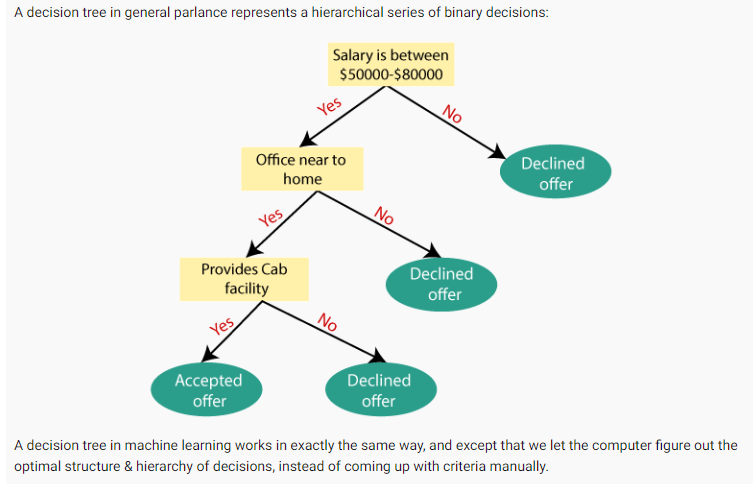

## 4.1 - Training

In [340]:
# We can use DecisionTreeClassifier from sklearn.tree to train a decision tree.
from sklearn.tree import DecisionTreeClassifier

In [342]:
model = DecisionTreeClassifier(random_state=42)

In [344]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 1.92 s
Wall time: 1.91 s


DecisionTreeClassifier(random_state=42)

## 4.2 - Evaluation

In [349]:
# Let's evaluate the decision tree using the accuracy score.
from sklearn.metrics import accuracy_score, confusion_matrix

In [351]:
train_preds = model.predict(X_train)

In [353]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [355]:
pd.value_counts(train_preds)

C:\Users\user\AppData\Local\Temp\ipykernel_6000\1258350197.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


No     76707
Yes    22281
Name: count, dtype: int64

In [357]:
# The decision tree also returns probabilities for each prediction.
train_probs = model.predict_proba(X_train)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [359]:
# Seems like the decision tree is quite confident about its predictions.
# Let's check the accuracy of its predictions.

accuracy_score(train_targets, train_preds)

0.9999797955307714

In [361]:
# The training set accuracy is close to 100%! But we can't rely solely on the training set accuracy,
# we must evaluate the model on the validation set too.
# We can make predictions and compute accuracy in one step using model.score

model.score(X_val, val_targets)

0.7921188555510418

In [363]:
# Although the training accuracy is 100%, the accuracy on the validation set is just about 79%,
# which is only marginally better then always predicting "No".

val_targets.value_counts() / len(val_targets)

RainTomorrow
No     0.788289
Yes    0.211711
Name: count, dtype: float64

It appears that the model has learned the training examples perfect, and doesn't generalize well to previously unseen examples. This phenomenon is called "overfitting", and reducing overfitting is one of the most important parts of any machine learning project.

## 4.3 - Visualization

In [367]:
from sklearn.tree import plot_tree, export_text

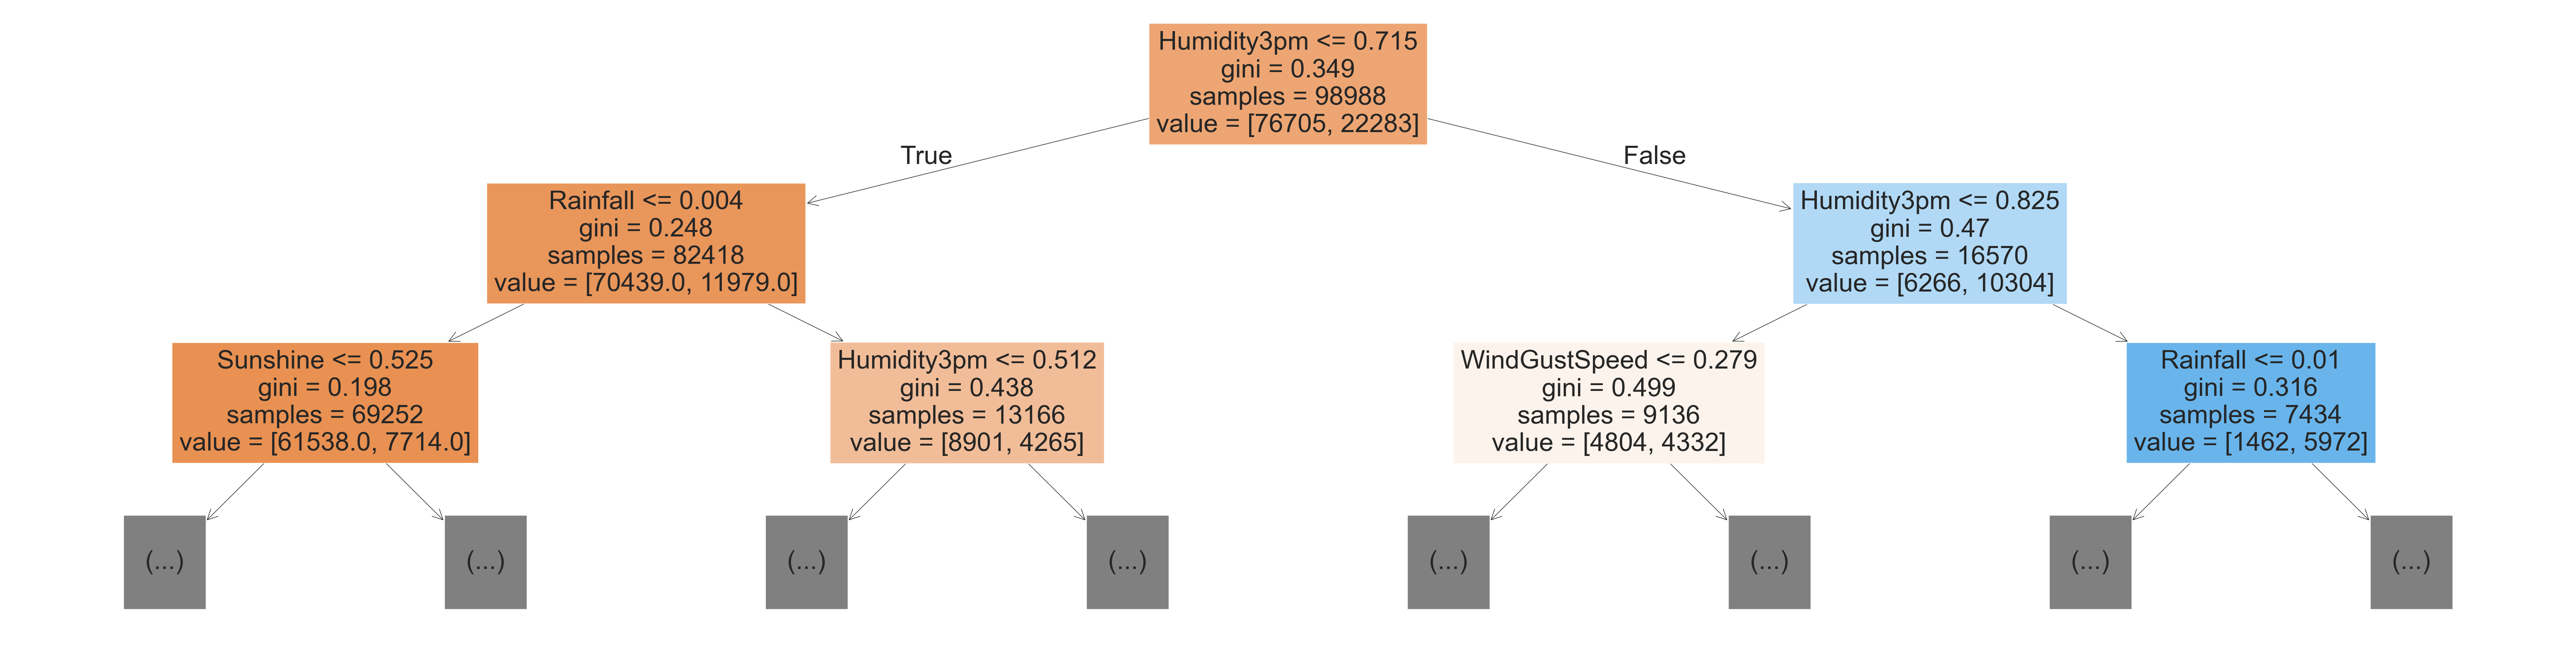

In [369]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

Note the gini value in each box. This is the loss function used by the decision tree to decide which column should be used for splitting the data, and at what point the column should be split. A lower Gini index indicates a better split. A perfect split (only one class on each side) has a Gini index of 0.  
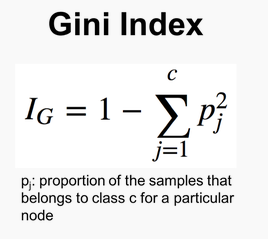  
Conceptually speaking, while training the models evaluates all possible splits across all possible columns and picks the best one. Then, it recursively performs an optimal split for the two portions. In practice, however, it's very inefficient to check all possible splits, so the model uses a heuristic (predefined strategy) combined with some randomization.

In [371]:
# Let's check the depth of the tree that was created.
model.tree_.max_depth

48

In [373]:
# We can also display the tree as text, which can be easier to follow for deeper trees.
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

## 4.4 - Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [378]:
feature_importances_

NameError: name 'feature_importances_' is not defined

In [380]:
model.feature_importances_

array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
       4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
       4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
       1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
       2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
       1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
       1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
       1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
       4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
       1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
       2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
       1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
       1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
       9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.12736888e-04,
      

In [382]:
# Let's turn this into a dataframe and visualize the most important features.

importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [384]:
importance_df.head(10)

feature  importance
9     Humidity3pm    0.261441
11    Pressure3pm    0.062057
2        Rainfall    0.059139
5   WindGustSpeed    0.056333
4        Sunshine    0.049465
8     Humidity9am    0.040218
14        Temp9am    0.035000
0         MinTemp    0.034894
10    Pressure9am    0.034415
1         MaxTemp    0.032361

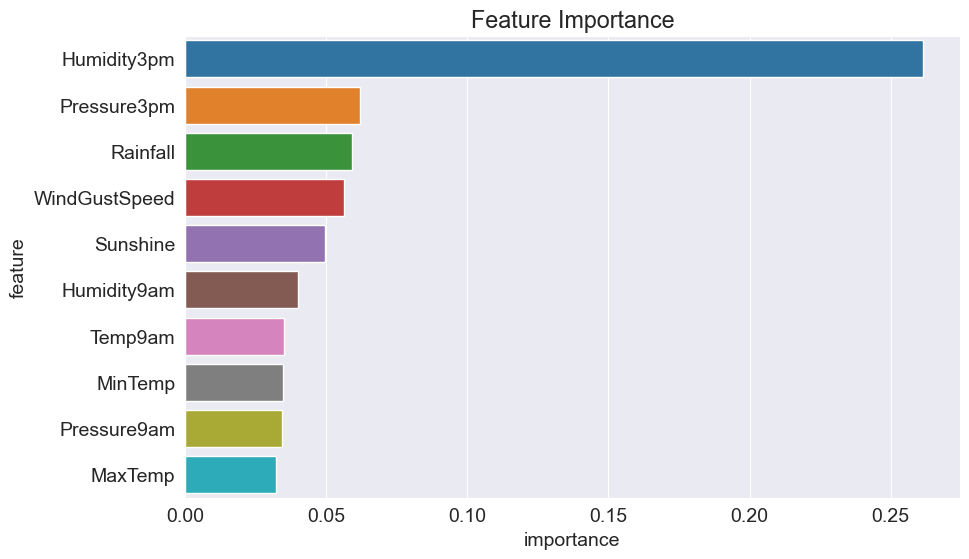

In [386]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

# 5 - Hyperparameter Tuning and Overfitting


As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting.

The DecisionTreeClassifier accepts several arguments, some of which can be modified to reduce overfitting.

In [390]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

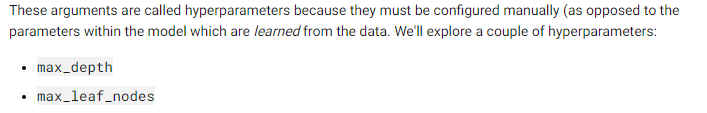

## 5.1 max_depth

In [394]:
# By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples,
# which may lead to better generalization

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [395]:
# We can compute the accuracy of the model on the training and validation sets using model.score
model.score(X_train, train_targets)

0.8291308037337859

In [397]:
model.score(X_val, val_targets)

0.8334397307178921

In [398]:
# Great, while the training accuracy of the model has gone down, the validation accuracy of the model has increased significantly.
model.classes_

array(['No', 'Yes'], dtype=object)

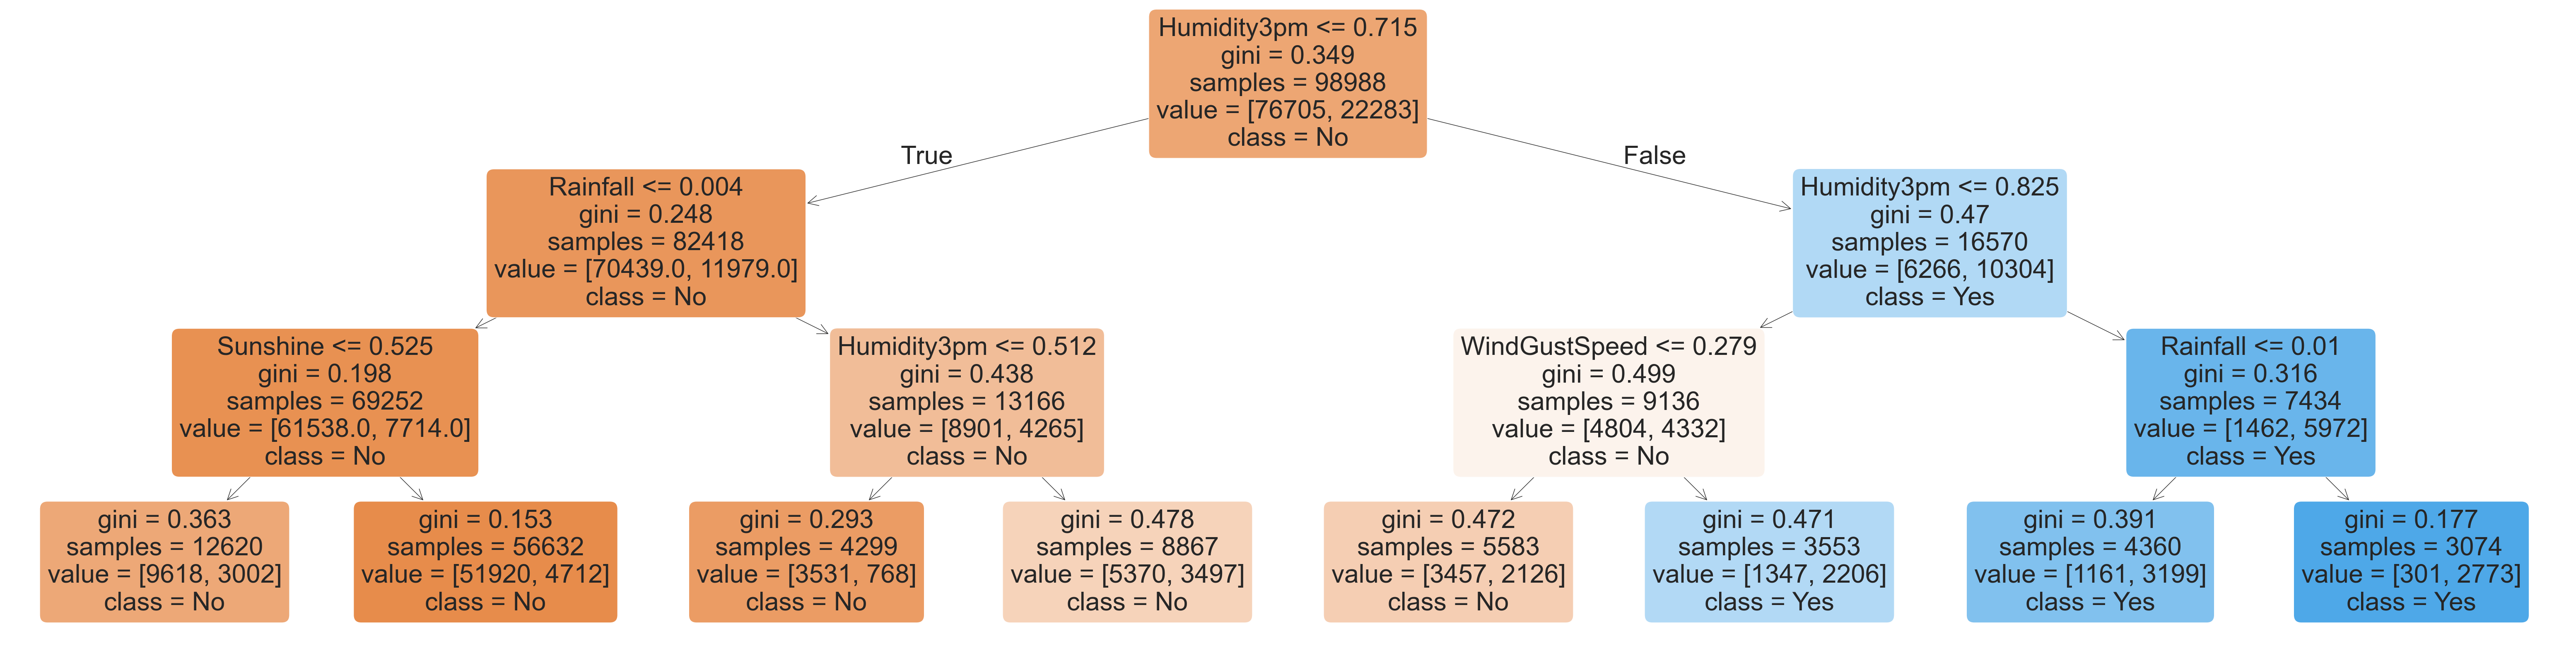

In [402]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [403]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



In [404]:
# Let's experiment with different depths using a helper function.
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [405]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: total: 24.5 s
Wall time: 24.7 s


In [406]:
errors_df

Max Depth  Training Error  Validation Error
0           1        0.184315          0.177935
1           2        0.179547          0.172712
2           3        0.170869          0.166560
3           4        0.165707          0.164355
4           5        0.160676          0.159074
5           6        0.156271          0.157275
6           7        0.153312          0.154605
7           8        0.147806          0.158029
8           9        0.140906          0.156578
9          10        0.132945          0.157333
10         11        0.123227          0.159248
11         12        0.113489          0.160815
12         13        0.101750          0.163833
13         14        0.089981          0.167373
14         15        0.078999          0.171261
15         16        0.068180          0.174279
16         17        0.058138          0.176890
17         18        0.048733          0.181243
18         19        0.040025          0.187569
19         20        0.032539          0.190297

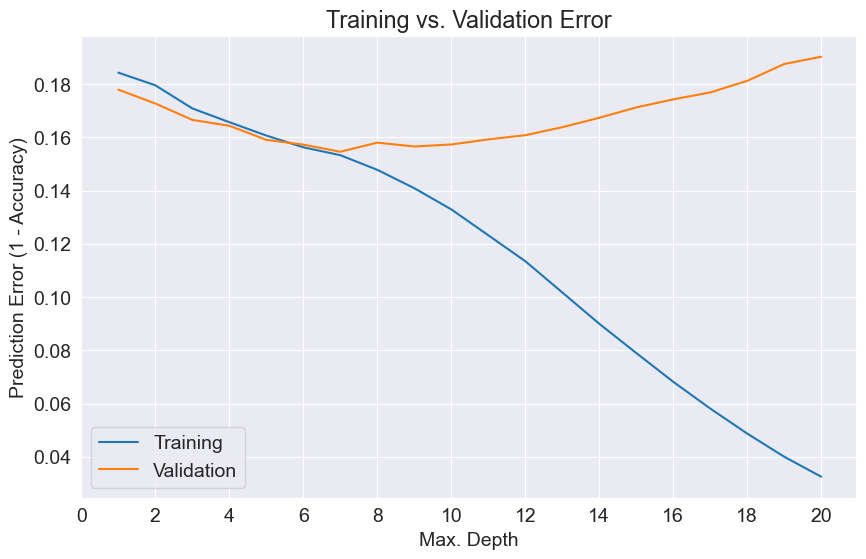

In [410]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

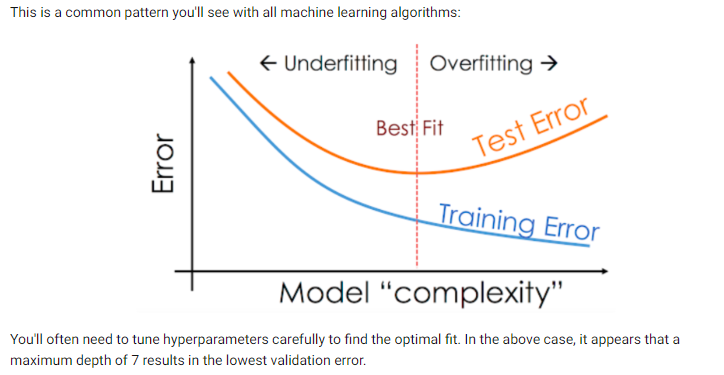

In [412]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.8453949277465034

## 5.2 max_leaf_nodes

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths.

In [415]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [416]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [417]:
model.score(X_train, train_targets)

0.8480421869317493

In [418]:
model.score(X_val, val_targets)

0.8442342290058615

In [419]:
model.tree_.max_depth

12

Notice that the model was able to achieve a greater depth of 12 for certain paths while keeping other paths shorter.

In [432]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

EXERCISE: A more advanced technique (but less commonly used technique) for reducing overfitting in decision trees is known as cost-complexity pruning. Learn more about it here: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html . Implement cost complexity pruning. Do you see any improvement in the validation accuracy?

# 6 - Training a Random Forest

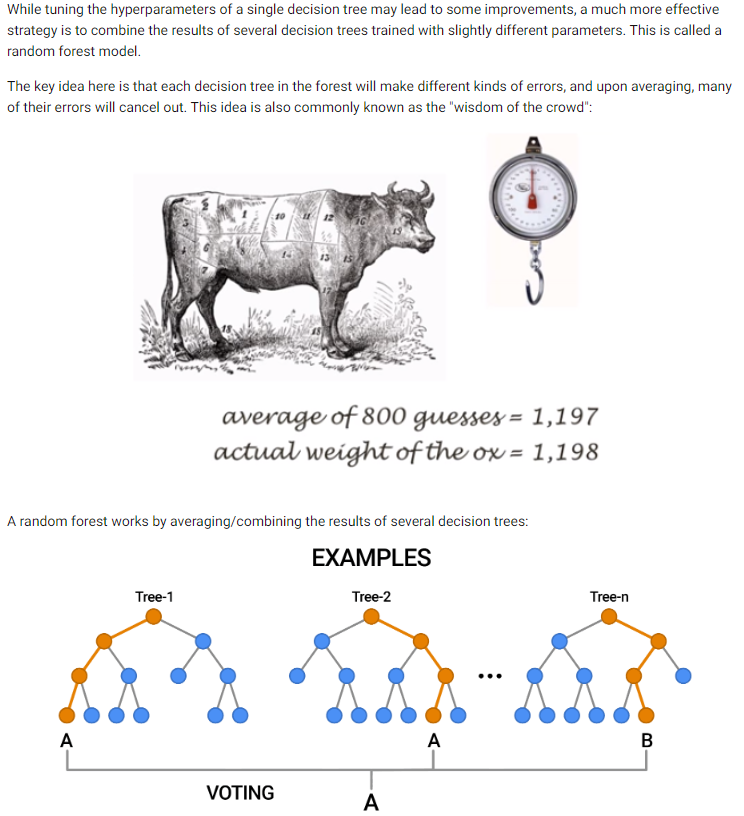

In [437]:
# We'll use the RandomForestClassifier class from sklearn.ensemble.
from sklearn.ensemble import RandomForestClassifier

In [439]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

# n_jobs allows the random forest to use mutiple parallel workers to train decision trees,
# and random_state=42 ensures that the we get the same results for each execution.

In [441]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 27.5 s
Wall time: 2.66 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [442]:
model.score(X_train, train_targets)

0.9999494888269285

In [443]:
model.score(X_val, val_targets)

0.8566537055307295

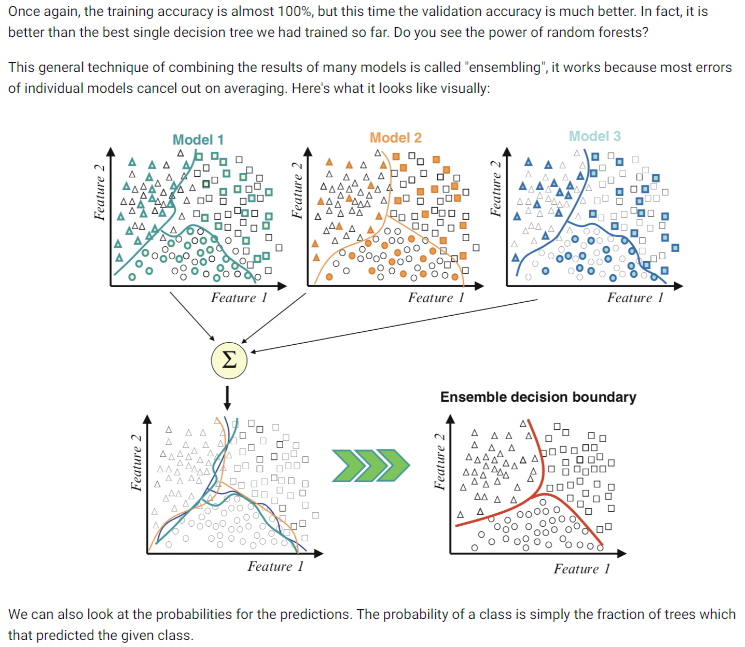

In [448]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.93, 0.07],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04]])

In [450]:
# We can can access individual decision trees using model.estimators_
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

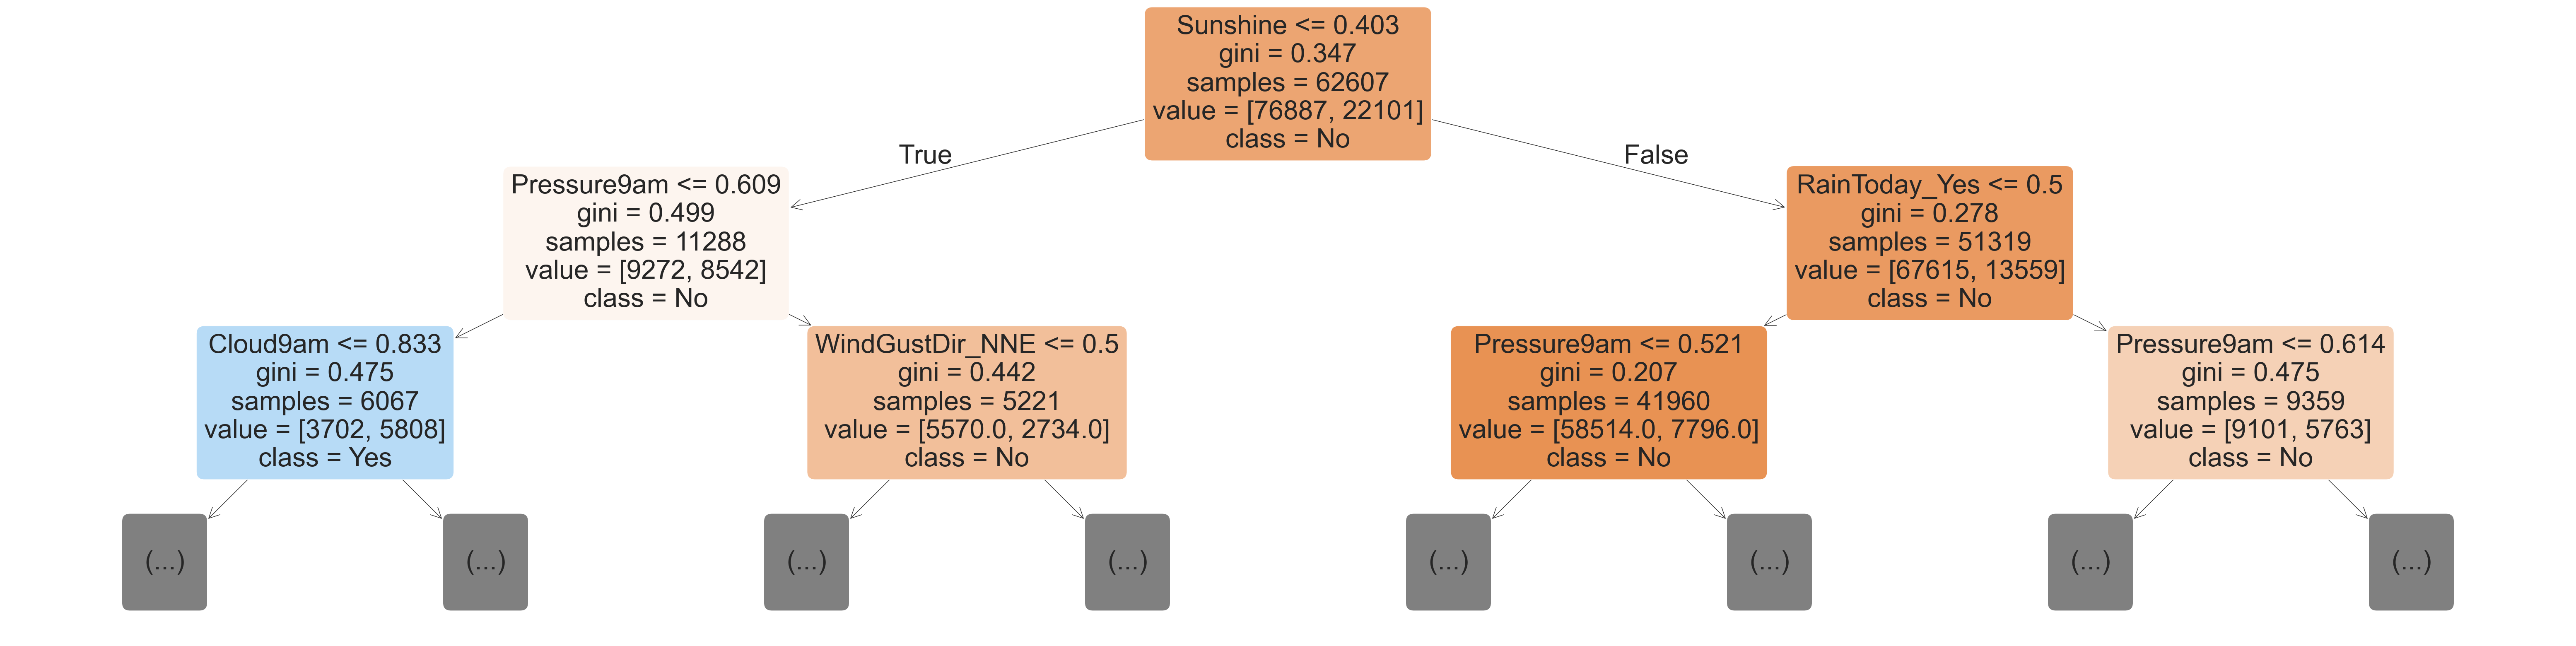

In [452]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [453]:
# Just like decision tree, random forests also assign an "importance" to each feature, by combining the importance values from individual trees.
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [456]:
importance_df.head(10)

feature  importance
9     Humidity3pm    0.139904
4        Sunshine    0.053696
11    Pressure3pm    0.052713
8     Humidity9am    0.050051
2        Rainfall    0.048077
10    Pressure9am    0.047944
5   WindGustSpeed    0.047477
15        Temp3pm    0.044379
1         MaxTemp    0.041865
0         MinTemp    0.041199

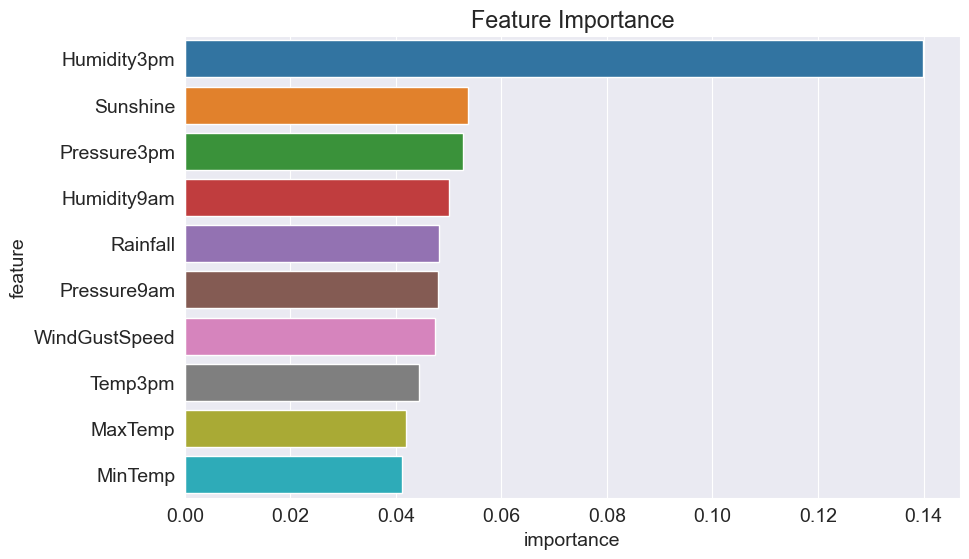

In [458]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

# 7 - Hyperparameter Tuning with Random Forests

In [461]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the 

In [463]:
# Let's create a base model with which we can compare models with tuned hyperparameters.
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)

In [464]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [465]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.9999494888269285, 0.8566537055307295)

## 7.1 - n_estimators

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed.

In [468]:
#  10 estimators
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [469]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.986958015112943, 0.8485868492832686)

In [470]:
base_accs

(0.9999494888269285, 0.8566537055307295)

In [472]:
# 500 estimators
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500)
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [475]:
model.score(X_train, train_targets)

0.9999797955307714

In [477]:
model.score(X_val, val_targets)

0.8577563693343393

In [480]:
base_accs

(0.9999494888269285, 0.8566537055307295)

In [482]:
def n_estimators_error(n):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=n)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Number of estimators': n, 'Training Error': train_acc, 'Validation Error': val_acc}

In [490]:
from tqdm import tqdm

RF_errors_n_estimators = pd.DataFrame([n_estimators_error(n) for n in tqdm(range(1, 51))])
RF_errors_n_estimators

100%|██████████| 50/50 [00:56<00:00,  1.12s/it]


Number of estimators  Training Error  Validation Error
0                      1        0.081192          0.217167
1                      2        0.075545          0.182230
2                      3        0.034368          0.179386
3                      4        0.040096          0.166386
4                      5        0.020467          0.164355
5                      6        0.025256          0.160583
6                      7        0.013284          0.157797
7                      8        0.017639          0.157101
8                      9        0.010153          0.153154
9                     10        0.013042          0.151413
10                    11        0.007546          0.151587
11                    12        0.009739          0.150775
12                    13        0.005637          0.149614
13                    14        0.007506          0.149556
14                    15        0.004304          0.148221
15                    16        0.005799          0.148453
16                    17        0.003586          0.146364
17                    18        0.004768          0.147351
18                    19        0.002798          0.146248
19                    20        0.003748          0.147293
20                    21        0.002182          0.145145
21                    22        0.002940          0.146132
22                    23        0.001909          0.145261
23                    24        0.002465          0.145842
24                    25        0.001616          0.144333
25                    26        0.002031          0.146306
26                    27        0.001283          0.144507
27                    28        0.001626          0.145029
28                    29        0.001101          0.144159
29                    30        0.001424          0.144449
30                    31        0.000909          0.143695
31                    32        0.001263          0.144797
32                    33        0.000657          0.143636
33                    34        0.000899          0.144391
34                    35        0.000586          0.142418
35                    36        0.000798          0.143636
36                    37        0.000465          0.142708
37                    38        0.000636          0.144101
38                    39        0.000465          0.142998
39                    40        0.000525          0.144217
40                    41        0.000424          0.143404
41                    42        0.000485          0.144681
42                    43        0.000333          0.143230
43                    44        0.000465          0.143985
44                    45        0.000293          0.143695
45                    46        0.000424          0.144797
46                    47        0.000273          0.143753
47                    48        0.000404          0.144391
48                    49        0.000263          0.142940
49                    50        0.000354          0.143869

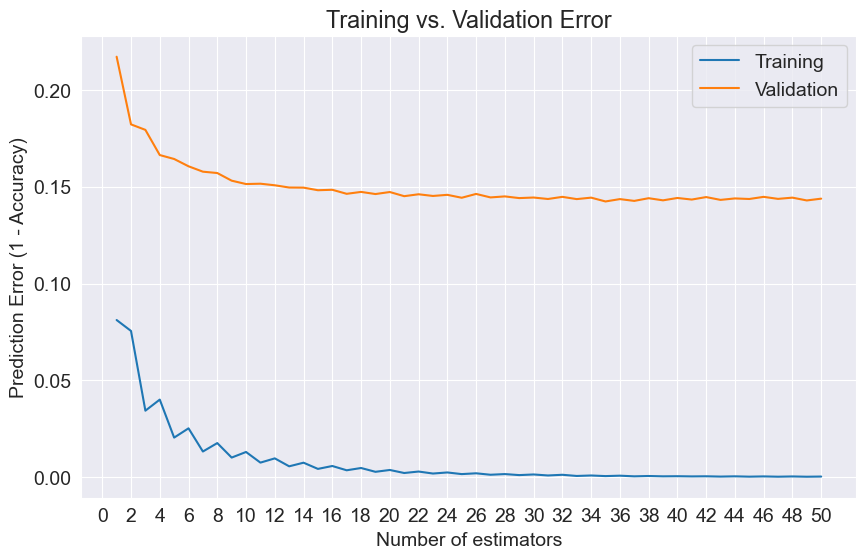

In [494]:
plt.figure()
plt.plot(RF_errors_n_estimators['Number of estimators'], RF_errors_n_estimators['Training Error'])
plt.plot(RF_errors_n_estimators['Number of estimators'], RF_errors_n_estimators['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,51, 2))
plt.xlabel('Number of estimators')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

## 7.2 - max_depth and max_leaf_nodes

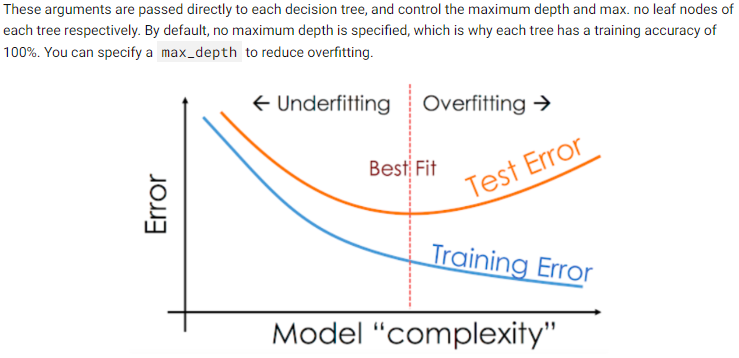

In [507]:
# Let's define a helper function test_params to make it easy to test hyperparameters.
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

# The double asterisks (**) allow you to pass a variable number of keyword arguments to the function,
# which are then accessible as a dictionary named params within the function.

In [501]:
test_params(max_depth=5)

(0.8197862367155615, 0.8240961058557251)

In [503]:
test_params(max_depth=26)

(0.9814826039519942, 0.8572340549010504)

In [505]:
test_params(max_leaf_nodes=2**5)

(0.8314341132258456, 0.833904010214149)

In [509]:
test_params(max_leaf_nodes=2**20)

(0.9999595910615429, 0.8568278103418258)

In [511]:
base_accs # no max depth or max leaf nodes

(0.9999494888269285, 0.8566537055307295)

## 7.3 - max_features

Instead of picking all features (columns) for every split, we can specify that only a fraction of features be chosen randomly to figure out a split

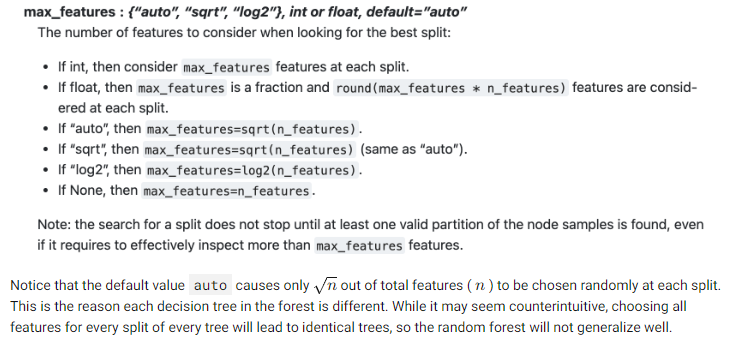

In [516]:
test_params(max_features='log2')

(0.9999595910615429, 0.8558992513493123)

In [518]:
test_params(max_features=3)

(0.9999494888269285, 0.8543323080494458)

In [520]:
test_params(max_features=6)

(0.9999595910615429, 0.8558992513493123)

In [522]:
base_accs

(0.9999494888269285, 0.8566537055307295)

## 7.4 - min_samples_split and min_samples_leaf

By default, the decision tree classifier tries to split every node that has 2 or more. You can increase the values of these arguments to change this behavior and reduce overfitting, especially for very large datasets.

In [528]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.9625005051117307, 0.8565956705936975)

In [530]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.8495676243585081, 0.8451047530613429)

In [532]:
base_accs

(0.9999494888269285, 0.8566537055307295)

## 7.5 - min_impurity_decrease

This argument is used to control the threshold for splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. It's default value is 0, and you can increase it to reduce overfitting.

In [536]:
test_params(min_impurity_decrease=1e-7)

(0.9996060128500425, 0.8561313910974406)

In [538]:
test_params(min_impurity_decrease=1e-2)

(0.774891906089627, 0.7882885497069235)

In [540]:
base_accs


(0.9999494888269285, 0.8566537055307295)

## 7.6 - bootstrap, max_samples

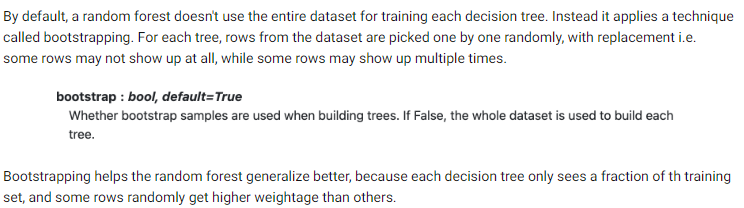

In [544]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8567697754047937)

In [546]:
base_accs

(0.9999494888269285, 0.8566537055307295)

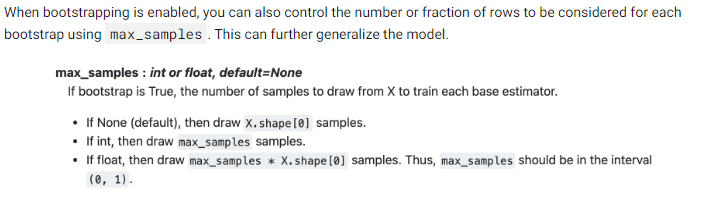

In [549]:
test_params(max_samples=0.9)

(0.9997676486038711, 0.8565376356566653)

In [551]:
base_accs

(0.9999494888269285, 0.8566537055307295)

## 7.7 - class_weight

In [554]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [556]:
test_params(class_weight='balanced')

(0.9999595910615429, 0.8553769369160235)

In [578]:
test_params(class_weight={'No': 1, 'Yes': 2.5})

(0.9999595910615429, 0.8564215657826011)

In [560]:
base_accs

(0.9999494888269285, 0.8566537055307295)

## 7.8 - Putting it together

Let's train a random forest with customized hyperparameters based on our learnings. Of course, different hyperpraams

In [582]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=7,
                               max_depth=30, 
                               class_weight={'No': 1, 'Yes': 1.5})

In [584]:
model.fit(X_train, train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [586]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9920192346547057, 0.8563054959085369)

In [588]:
base_accs

(0.9999494888269285, 0.8566537055307295)

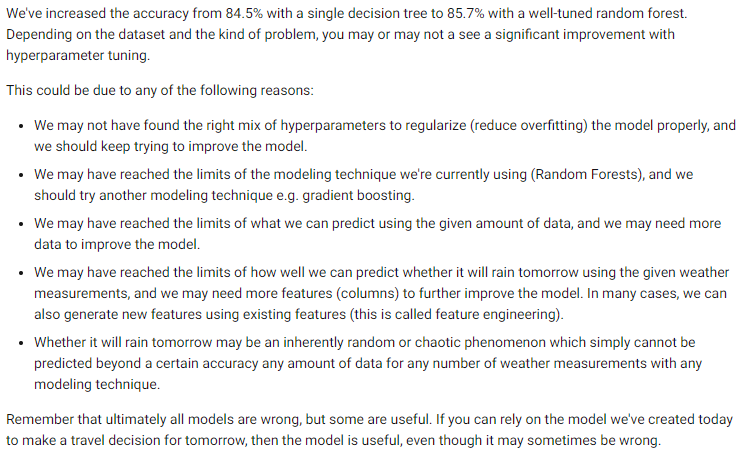

## 7.9 - Strategy for Tuning Hyperparameters

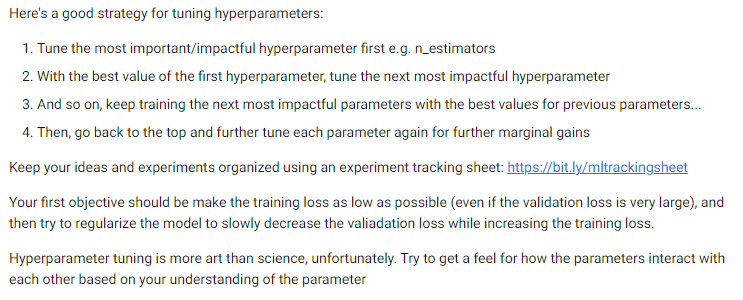  
https://bit.ly/mltrackingsheet

# 8 - Making Predictions on New Inputs


In [597]:
# Let's define a helper function to make predictions on new inputs.
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [599]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [601]:
predict_input(model, new_input)

C:\Users\user\AppData\Local\Temp\ipykernel_6000\537002917.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
C:\Users\user\AppData\Local\Temp\ipykernel_6000\537002917.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
C:\Users\user\AppData\Local\Temp\ipykernel_6000\537002917.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

('Yes', 0.7608595348304203)

In [603]:
raw_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

# 9 - Saving and Loading Trained Models

We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it's also important to save imputers, scalers, encoders and even column names. Anything that will be required while generating predictions using the model should be saved.

We can use the joblib module to save and load Python objects on the disk.

In [607]:
import joblib

In [609]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [611]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

In [613]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [615]:
test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.8451913451913452

# 10 - Summary and References

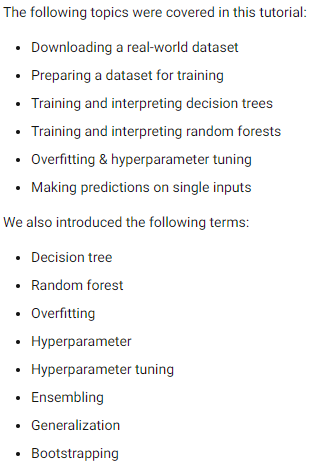

Check out the following resources to learn more:

https://scikit-learn.org/stable/modules/tree.ht
ml
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.h
tml
https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduc
tion
https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engine
ering
https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-
search
https://www.kaggle.com/c/home-credit-default-risk/discussio  n/64821

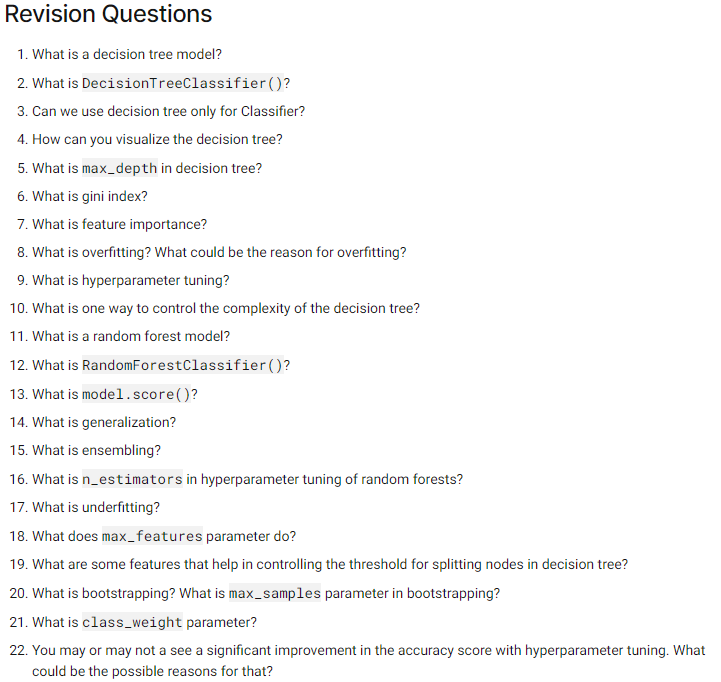